In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
def get_cloud():
    n = 1000
    c1 = np.array([2,2])
    c2 = np.array([-2,-2])
    x1 = np.random.randn(n,2) + c1
    x2 = np.random.randn(n,2) + c2
    x = np.r_[x1,x2]
    y = np.r_[[-1]*n + [1]*n]
    return x,y

In [49]:
X,y = get_cloud()

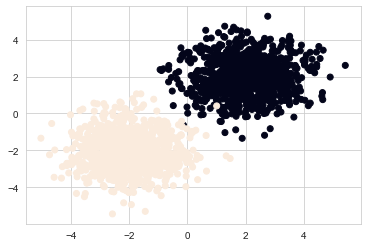

In [50]:
plt.scatter(x=X[:,1],y=X[:,0],c=y)

In [32]:
class LinearSVM:
    def __init__(self, C=1.0):
        self.C = C

    def _objective(self,margin):
        return 0.5 *  self.w.dot(self.w) + self.C * np.maximum(0,1 - margin).sum()

    def _decision_function(self,X):
        return X.dot(self.w) + self.b

    def fit(self,X,y,lr=1e-5,n_iter=400):
        N,D = X.shape
        self.N = N
        self.w = np.random.randn(D)
        self.b = 0

        # gradient descent
        losses = []
        for _ in range(n_iter):
            margin = y * self._decision_function(X)
            loss = self._objective(margin)
            losses.append(loss)

            # update

            # consider only the points that violet the margin
            idx = np.where(margin<1)[0]
            grad_w = self.w - self.C * y[idx].dot(X[idx])
            self.w -= lr * grad_w
            grad_b = -self.C * y[idx].sum()
            self.b -= lr * grad_b

        self.support_ = np.where(y * self._decision_function(X) <= 1)[0]
        print(f"num SVs : {len(self.support_)}")
        print(f"w: {self.w}")
        print(f"b: {self.b}")

        plt.plot(losses)
        plt.title("Loss per iteration")
        plt.show()

    def predict(self,X):
        return np.sign(self._decision_function(X))

    def score(self,X,y):
        p = self.predict(X)
        return np.mean(y == p)




In [56]:
def plot_decision_boundary(model, X, y, resolution=100, color=('b','k','r')):
    fig,ax = plt.subplots()

    xs = np.linspace(X[:,0].min(),X[:,0].max(),resolution)
    ys = np.linspace(X[:,1].min(),X[:,1].max(),resolution)

    grid = [[model._decision_function(np.array([xr,yr])) for yr in ys ] for xr in xs]
    grid = np.array(grid).reshape(len(xs),len(ys))

    ax.contour(xs,ys,grid.T,(-1,0,1),linewidths=(1,1,1),
               linestyles=("--","-","--"),colors=color)
    ax.scatter(X[:,0],X[:,1],c=y,lw=0,alpha=0.3,cmap="seismic")

    mask = model.support_
    ax.scatter(X[:,0][mask],X[:,1][mask],c=y[mask],cmap="seismic")

    ax.scatter([0],[0],c="k",marker="x")
    plt.show()

num SVs : 28
w: [-2.03093325 -2.18702908]
b: -0.08200000000000002


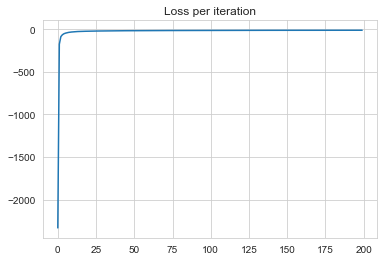

train duration : 0:00:00.155316
train score : 0.9971428571428571   with duration 0:00:00.001027
test score : 0.9966666666666667 with duration 0:00:00


In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

X,y = get_cloud()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearSVM(C=1.0)

start = datetime.now()
model.fit(X_train,y_train,lr=1e-3,n_iter=200)
print(f"train duration : {datetime.now() -start}")

start = datetime.now()
print(f"train score : {model.score(X_train,y_train)}   with duration {datetime.now() -start}")

start = datetime.now()
print(f"test score : {model.score(X_test,y_test)} with duration {datetime.now() -start}")

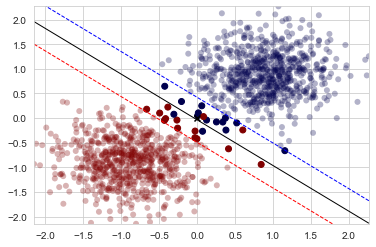

In [58]:
plot_decision_boundary(model,X_train,y_train)